In [2]:
import pandas as pd
import numpy as np
import os
import tsfresh
import tsfel
import matplotlib.pyplot as plt
import pyeeg
from tsfresh import select_features
from tsfel import add_feature_json


# Data prepration

### Transforming raw data into a dataset

Loading Raw Data

In [3]:
A_directory=r"C:\Users\Bacem\Desktop\data\A"
B_directory=r"C:\Users\Bacem\Desktop\data\B"
C_directory=r"C:\Users\Bacem\Desktop\data\C"
D_directory=r"C:\Users\Bacem\Desktop\data\D"
E_directory=r"C:\Users\Bacem\Desktop\data\E"

In [4]:
#txt_files is a method to load text files into a list
def txt_files(path): 
    fichiers=[] 
    for root, dirs, files in os.walk(path): 
        for i in files: 
            fichiers.append(os.path.join(root, i)) 
    txtlist=[]
    for f in fichiers:
        if f.endswith(".txt") or f.endswith(".TXT"):
            txtlist.append(f)
    return txtlist

Importing text files into different lists

In [5]:
A_files=txt_files(A_directory)
B_files=txt_files(B_directory)
C_files=txt_files(C_directory)
D_files=txt_files(D_directory)
E_files=txt_files(E_directory)

Creation of a dataframe where raw data will be saved

In [6]:
data = pd.read_csv(r"C:\Users\Bacem\Desktop\4DS\Semestre2\Projet\F001.txt",header=None,names=['c0'])
df=pd.DataFrame(data)

In [7]:
df.shape

(4097, 1)

Saving class A records in our new dataframe

In [8]:
s=1
for i in A_files:
    nom="A"+str(s)
    s+=1
    data1 = pd.read_csv(i,header=None)
    df1=pd.DataFrame(data1)
    df[nom]=df1
    
        
    

Saving class B records in our new dataframe

In [9]:
s=1
for i in B_files:
    nom="B"+str(s)
    s+=1
    data1 = pd.read_csv(i,header=None)
    df1=pd.DataFrame(data1)
    df[nom]=df1

Saving class C records in our new dataframe

In [10]:
s=1
for i in C_files:
    nom="C"+str(s)
    s+=1
    data1 = pd.read_csv(i,header=None)
    df1=pd.DataFrame(data1)
    df[nom]=df1

Saving class E records in our new dataframe

In [11]:
s=1
for i in D_files:
    nom="D"+str(s)
    s+=1
    data1 = pd.read_csv(i,header=None)
    df1=pd.DataFrame(data1)
    df[nom]=df1

Saving class E records in our new dataframe

In [12]:
s=1
for i in E_files:
    nom="E"+str(s)
    s+=1
    data1 = pd.read_csv(i,header=None)
    df1=pd.DataFrame(data1)
    df[nom]=df1

In [13]:
df.pop('c0')

0       34
1       33
2       28
3       22
4       21
        ..
4092    40
4093    45
4094    39
4095    41
4096     7
Name: c0, Length: 4097, dtype: int64

In [14]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,E91,E92,E93,E94,E95,E96,E97,E98,E99,E100
0,12,-56,-37,-31,14,-87,-2,-31,8,-41,...,-129,-26,308,-155,-113,-40,187,-438,-476,23
1,22,-50,-22,-43,26,-89,20,-16,17,-38,...,-309,1,367,-283,-185,-58,44,-561,-518,144
2,35,-64,-17,-39,32,-73,42,10,29,-31,...,-432,29,413,-456,-269,-75,-147,-622,-521,228
3,45,-91,-24,-39,25,-69,48,28,46,-25,...,-412,41,429,-541,-328,-88,-368,-581,-362,260
4,69,-135,-31,-9,16,-51,27,31,50,-32,...,-278,33,400,-474,-312,-89,-550,-460,-68,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,-25,-172,-3,11,-55,32,-38,0,-48,38,...,-44,-205,-1547,93,141,-3,748,40,224,-272
4093,-28,-180,7,12,-58,37,-23,3,-50,22,...,95,-209,-1023,26,171,-10,763,-47,299,-272
4094,-11,-173,3,-6,-32,18,-18,1,-40,1,...,12,-207,-557,-27,148,-13,703,-118,246,-155
4095,8,-162,4,10,-6,7,-6,1,-36,-13,...,-254,-210,-305,-85,111,-16,446,-163,556,6


Creation of time axis

In [15]:
time=[]
s=0
for i in range (0,4097):
    time.append(s)
    s+=1/(173.61)

Insertion of the new axis in the dataframe

In [16]:
df['time']=time

In [17]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,E92,E93,E94,E95,E96,E97,E98,E99,E100,time
0,12,-56,-37,-31,14,-87,-2,-31,8,-41,...,-26,308,-155,-113,-40,187,-438,-476,23,0.000000
1,22,-50,-22,-43,26,-89,20,-16,17,-38,...,1,367,-283,-185,-58,44,-561,-518,144,0.005760
2,35,-64,-17,-39,32,-73,42,10,29,-31,...,29,413,-456,-269,-75,-147,-622,-521,228,0.011520
3,45,-91,-24,-39,25,-69,48,28,46,-25,...,41,429,-541,-328,-88,-368,-581,-362,260,0.017280
4,69,-135,-31,-9,16,-51,27,31,50,-32,...,33,400,-474,-312,-89,-550,-460,-68,255,0.023040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4092,-25,-172,-3,11,-55,32,-38,0,-48,38,...,-205,-1547,93,141,-3,748,40,224,-272,23.570071
4093,-28,-180,7,12,-58,37,-23,3,-50,22,...,-209,-1023,26,171,-10,763,-47,299,-272,23.575831
4094,-11,-173,3,-6,-32,18,-18,1,-40,1,...,-207,-557,-27,148,-13,703,-118,246,-155,23.581591
4095,8,-162,4,10,-6,7,-6,1,-36,-13,...,-210,-305,-85,111,-16,446,-163,556,6,23.587351


Convertion of column 'time' to timedelta type

In [18]:
df['time']=pd.to_timedelta(df['time'],unit='s')

Setting time as dataframe's index

In [19]:
df=df.set_index('time')

In [20]:
df.index

TimedeltaIndex([       '00:00:00', '00:00:00.005760', '00:00:00.011520',
                '00:00:00.017280', '00:00:00.023040', '00:00:00.028800',
                '00:00:00.034560', '00:00:00.040320', '00:00:00.046080',
                '00:00:00.051840',
                ...
                '00:00:23.541270', '00:00:23.547030', '00:00:23.552790',
                '00:00:23.558550', '00:00:23.564310', '00:00:23.570070',
                '00:00:23.575830', '00:00:23.581590', '00:00:23.587350',
                '00:00:23.593110'],
               dtype='timedelta64[ns]', name='time', length=4097, freq=None)

In [21]:
df

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,E91,E92,E93,E94,E95,E96,E97,E98,E99,E100
time,,,,,,,,,,,,,,,,,,,,,
00:00:00,12,-56,-37,-31,14,-87,-2,-31,8,-41,...,-129,-26,308,-155,-113,-40,187,-438,-476,23
00:00:00.005760,22,-50,-22,-43,26,-89,20,-16,17,-38,...,-309,1,367,-283,-185,-58,44,-561,-518,144
00:00:00.011520,35,-64,-17,-39,32,-73,42,10,29,-31,...,-432,29,413,-456,-269,-75,-147,-622,-521,228
00:00:00.017280,45,-91,-24,-39,25,-69,48,28,46,-25,...,-412,41,429,-541,-328,-88,-368,-581,-362,260
00:00:00.023040,69,-135,-31,-9,16,-51,27,31,50,-32,...,-278,33,400,-474,-312,-89,-550,-460,-68,255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:00:23.570070,-25,-172,-3,11,-55,32,-38,0,-48,38,...,-44,-205,-1547,93,141,-3,748,40,224,-272
00:00:23.575830,-28,-180,7,12,-58,37,-23,3,-50,22,...,95,-209,-1023,26,171,-10,763,-47,299,-272
00:00:23.581590,-11,-173,3,-6,-32,18,-18,1,-40,1,...,12,-207,-557,-27,148,-13,703,-118,246,-155


## Signal filtering

Unfiltred signals vizualisation

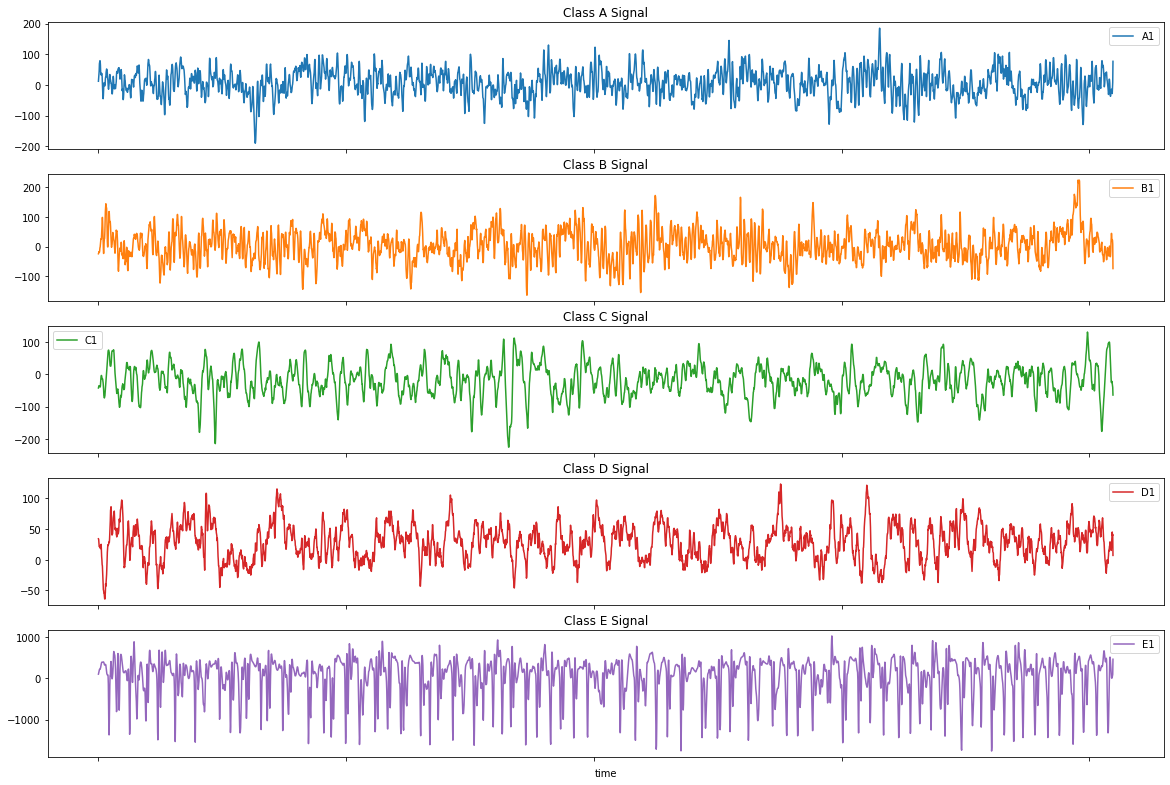

In [22]:
df.iloc[:,[0,100,200,300,400]].plot(subplots=True, figsize=(20, 15),title=['Class A Signal','Class B Signal','Class C Signal','Class D Signal','Class E Signal']);

Defining the filtering method:

In [23]:
def momentum (z):
  n_iter = len(z)
  beta = 0.9
  temp = np.zeros((len(z)))
  
  for k in range(1,n_iter-1):
    temp[k+1] = beta * temp[k] + (1-beta) * z[k] 
    
  return temp

In [24]:
df_filtred=df.copy()

Filtering all signals

In [25]:
for i in df_filtred.columns:
    df_filtred[i]=momentum(df_filtred[i])

Filtred signals vizualisation

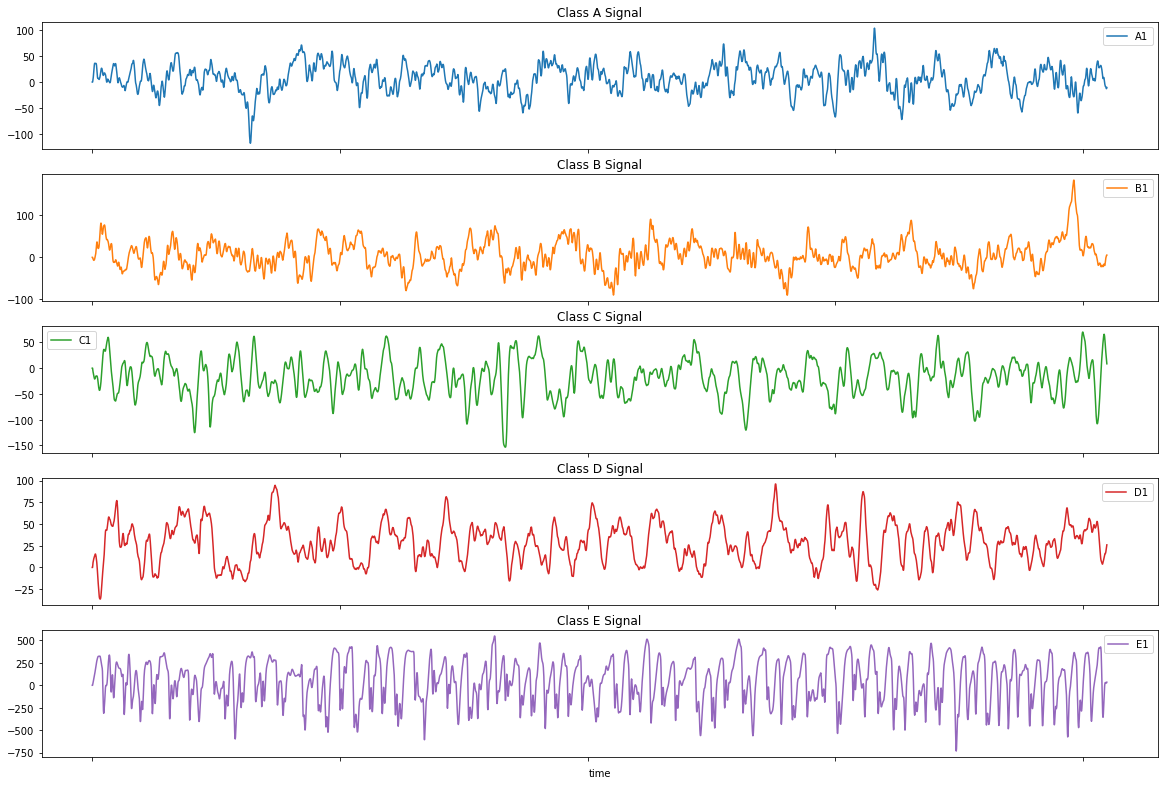

In [26]:
df_filtred.iloc[:,[0,100,200,300,400]].plot(subplots=True, figsize=(20, 15),title=['Class A Signal','Class B Signal','Class C Signal','Class D Signal','Class E Signal']);

Saving the data into a csv file

In [59]:
df.to_csv("bonn_university_data.csv")

In [60]:
df_filtred.to_csv("filtred_bonn_university_data.csv")

# Feature extraction

## Implementation of personalised features on TSFEL

In [28]:
file_path=r"C:\Users\Bacem\Desktop\4DS\Semestre2\Projet\p_features.py"
json_path=r"C:\Users\Bacem\anaconda3\Lib\site-packages\tsfel\feature_extraction\features.json"
add_feature_json(file_path,json_path)

Feature PFD was added.
Feature FISHER_INFO was added.
Feature HURST was added.
Feature HFD was added.
Feature SVD_ENTROPY was added.
Feature SPECTRAL_ENTROPY was added.


Feature exraction configuration

In [29]:
cfg = tsfel.get_features_by_domain() 

Extracting all features

In [30]:
compteur=0
all_features=pd.DataFrame()
for i in df.columns:
    a = tsfel.time_series_features_extractor(cfg,df[i], fs=173.6, window_size=173,features_path=file_path)
    all_features=pd.concat([all_features,a])
    compteur+=1
    print(compteur)

*** Feature extraction started ***



*** Feature extraction finished ***
1
*** Feature extraction started ***



*** Feature extraction finished ***
2
*** Feature extraction started ***



*** Feature extraction finished ***
3
*** Feature extraction started ***



*** Feature extraction finished ***
4
*** Feature extraction started ***



*** Feature extraction finished ***
5
*** Feature extraction started ***



*** Feature extraction finished ***
6
*** Feature extraction started ***



*** Feature extraction finished ***
7
*** Feature extraction started ***



*** Feature extraction finished ***
8
*** Feature extraction started ***



*** Feature extraction finished ***
9
*** Feature extraction started ***



*** Feature extraction finished ***
10
*** Feature extraction started ***



*** Feature extraction finished ***
11
*** Feature extraction started ***



*** Feature extraction finished ***
12
*** Feature extraction started ***



*** Feature extraction finished ***
13
*** Feature extraction started ***



*** Feature extraction finished ***
14
*** Feature extraction started ***



*** Feature extraction finished ***
15
*** Feature extraction started ***



*** Feature extraction finished ***
16
*** Feature extraction started ***



*** Feature extraction finished ***
17
*** Feature extraction started ***



*** Feature extraction finished ***
18
*** Feature extraction started ***



*** Feature extraction finished ***
19
*** Feature extraction started ***



*** Feature extraction finished ***
20
*** Feature extraction started ***



*** Feature extraction finished ***
21
*** Feature extraction started ***



*** Feature extraction finished ***
22
*** Feature extraction started ***



*** Feature extraction finished ***
23
*** Feature extraction started ***



*** Feature extraction finished ***
24
*** Feature extraction started ***



*** Feature extraction finished ***
25
*** Feature extraction started ***



*** Feature extraction finished ***
26
*** Feature extraction started ***



*** Feature extraction finished ***
27
*** Feature extraction started ***



*** Feature extraction finished ***
28
*** Feature extraction started ***



*** Feature extraction finished ***
29
*** Feature extraction started ***



*** Feature extraction finished ***
30
*** Feature extraction started ***



*** Feature extraction finished ***
31
*** Feature extraction started ***



*** Feature extraction finished ***
32
*** Feature extraction started ***



*** Feature extraction finished ***
33
*** Feature extraction started ***



*** Feature extraction finished ***
34
*** Feature extraction started ***



*** Feature extraction finished ***
35
*** Feature extraction started ***



*** Feature extraction finished ***
36
*** Feature extraction started ***



*** Feature extraction finished ***
37
*** Feature extraction started ***



*** Feature extraction finished ***
38
*** Feature extraction started ***



*** Feature extraction finished ***
39
*** Feature extraction started ***



*** Feature extraction finished ***
40
*** Feature extraction started ***



*** Feature extraction finished ***
41
*** Feature extraction started ***



*** Feature extraction finished ***
42
*** Feature extraction started ***



*** Feature extraction finished ***
43
*** Feature extraction started ***



*** Feature extraction finished ***
44
*** Feature extraction started ***



*** Feature extraction finished ***
45
*** Feature extraction started ***



*** Feature extraction finished ***
46
*** Feature extraction started ***



*** Feature extraction finished ***
47
*** Feature extraction started ***



*** Feature extraction finished ***
48
*** Feature extraction started ***



*** Feature extraction finished ***
49
*** Feature extraction started ***



*** Feature extraction finished ***
50
*** Feature extraction started ***



*** Feature extraction finished ***
51
*** Feature extraction started ***



*** Feature extraction finished ***
52
*** Feature extraction started ***



*** Feature extraction finished ***
53
*** Feature extraction started ***



*** Feature extraction finished ***
54
*** Feature extraction started ***



*** Feature extraction finished ***
55
*** Feature extraction started ***



*** Feature extraction finished ***
56
*** Feature extraction started ***



*** Feature extraction finished ***
57
*** Feature extraction started ***



*** Feature extraction finished ***
58
*** Feature extraction started ***



*** Feature extraction finished ***
59
*** Feature extraction started ***



*** Feature extraction finished ***
60
*** Feature extraction started ***



*** Feature extraction finished ***
61
*** Feature extraction started ***



*** Feature extraction finished ***
62
*** Feature extraction started ***



*** Feature extraction finished ***
63
*** Feature extraction started ***



*** Feature extraction finished ***
64
*** Feature extraction started ***



*** Feature extraction finished ***
65
*** Feature extraction started ***



*** Feature extraction finished ***
66
*** Feature extraction started ***



*** Feature extraction finished ***
67
*** Feature extraction started ***



*** Feature extraction finished ***
68
*** Feature extraction started ***



*** Feature extraction finished ***
69
*** Feature extraction started ***



*** Feature extraction finished ***
70
*** Feature extraction started ***



*** Feature extraction finished ***
71
*** Feature extraction started ***



*** Feature extraction finished ***
72
*** Feature extraction started ***



*** Feature extraction finished ***
73
*** Feature extraction started ***



*** Feature extraction finished ***
74
*** Feature extraction started ***



*** Feature extraction finished ***
75
*** Feature extraction started ***



*** Feature extraction finished ***
76
*** Feature extraction started ***



*** Feature extraction finished ***
77
*** Feature extraction started ***



*** Feature extraction finished ***
78
*** Feature extraction started ***



*** Feature extraction finished ***
79
*** Feature extraction started ***



*** Feature extraction finished ***
80
*** Feature extraction started ***



*** Feature extraction finished ***
81
*** Feature extraction started ***



*** Feature extraction finished ***
82
*** Feature extraction started ***



*** Feature extraction finished ***
83
*** Feature extraction started ***



*** Feature extraction finished ***
84
*** Feature extraction started ***



*** Feature extraction finished ***
85
*** Feature extraction started ***



*** Feature extraction finished ***
86
*** Feature extraction started ***



*** Feature extraction finished ***
87
*** Feature extraction started ***



*** Feature extraction finished ***
88
*** Feature extraction started ***



*** Feature extraction finished ***
89
*** Feature extraction started ***



*** Feature extraction finished ***
90
*** Feature extraction started ***



*** Feature extraction finished ***
91
*** Feature extraction started ***



*** Feature extraction finished ***
92
*** Feature extraction started ***



*** Feature extraction finished ***
93
*** Feature extraction started ***



*** Feature extraction finished ***
94
*** Feature extraction started ***



*** Feature extraction finished ***
95
*** Feature extraction started ***



*** Feature extraction finished ***
96
*** Feature extraction started ***



*** Feature extraction finished ***
97
*** Feature extraction started ***



*** Feature extraction finished ***
98
*** Feature extraction started ***



*** Feature extraction finished ***
99
*** Feature extraction started ***



*** Feature extraction finished ***
100
*** Feature extraction started ***



*** Feature extraction finished ***
101
*** Feature extraction started ***



*** Feature extraction finished ***
102
*** Feature extraction started ***



*** Feature extraction finished ***
103
*** Feature extraction started ***



*** Feature extraction finished ***
104
*** Feature extraction started ***



*** Feature extraction finished ***
105
*** Feature extraction started ***



*** Feature extraction finished ***
106
*** Feature extraction started ***



*** Feature extraction finished ***
107
*** Feature extraction started ***



*** Feature extraction finished ***
108
*** Feature extraction started ***



*** Feature extraction finished ***
109
*** Feature extraction started ***



*** Feature extraction finished ***
110
*** Feature extraction started ***



*** Feature extraction finished ***
111
*** Feature extraction started ***



*** Feature extraction finished ***
112
*** Feature extraction started ***



*** Feature extraction finished ***
113
*** Feature extraction started ***



*** Feature extraction finished ***
114
*** Feature extraction started ***



*** Feature extraction finished ***
115
*** Feature extraction started ***



*** Feature extraction finished ***
116
*** Feature extraction started ***



*** Feature extraction finished ***
117
*** Feature extraction started ***



*** Feature extraction finished ***
118
*** Feature extraction started ***



*** Feature extraction finished ***
119
*** Feature extraction started ***



*** Feature extraction finished ***
120
*** Feature extraction started ***



*** Feature extraction finished ***
121
*** Feature extraction started ***



*** Feature extraction finished ***
122
*** Feature extraction started ***



*** Feature extraction finished ***
123
*** Feature extraction started ***



*** Feature extraction finished ***
124
*** Feature extraction started ***



*** Feature extraction finished ***
125
*** Feature extraction started ***



*** Feature extraction finished ***
126
*** Feature extraction started ***



*** Feature extraction finished ***
127
*** Feature extraction started ***



*** Feature extraction finished ***
128
*** Feature extraction started ***



*** Feature extraction finished ***
129
*** Feature extraction started ***



*** Feature extraction finished ***
130
*** Feature extraction started ***



*** Feature extraction finished ***
131
*** Feature extraction started ***



*** Feature extraction finished ***
132
*** Feature extraction started ***



*** Feature extraction finished ***
133
*** Feature extraction started ***



*** Feature extraction finished ***
134
*** Feature extraction started ***



*** Feature extraction finished ***
135
*** Feature extraction started ***



*** Feature extraction finished ***
136
*** Feature extraction started ***



*** Feature extraction finished ***
137
*** Feature extraction started ***



*** Feature extraction finished ***
138
*** Feature extraction started ***



*** Feature extraction finished ***
139
*** Feature extraction started ***



*** Feature extraction finished ***
140
*** Feature extraction started ***



*** Feature extraction finished ***
141
*** Feature extraction started ***



*** Feature extraction finished ***
142
*** Feature extraction started ***



*** Feature extraction finished ***
143
*** Feature extraction started ***



*** Feature extraction finished ***
144
*** Feature extraction started ***



*** Feature extraction finished ***
145
*** Feature extraction started ***



*** Feature extraction finished ***
146
*** Feature extraction started ***



*** Feature extraction finished ***
147
*** Feature extraction started ***



*** Feature extraction finished ***
148
*** Feature extraction started ***



*** Feature extraction finished ***
149
*** Feature extraction started ***



*** Feature extraction finished ***
150
*** Feature extraction started ***



*** Feature extraction finished ***
151
*** Feature extraction started ***



*** Feature extraction finished ***
152
*** Feature extraction started ***



*** Feature extraction finished ***
153
*** Feature extraction started ***



*** Feature extraction finished ***
154
*** Feature extraction started ***



*** Feature extraction finished ***
155
*** Feature extraction started ***



*** Feature extraction finished ***
156
*** Feature extraction started ***



*** Feature extraction finished ***
157
*** Feature extraction started ***



*** Feature extraction finished ***
158
*** Feature extraction started ***



*** Feature extraction finished ***
159
*** Feature extraction started ***



*** Feature extraction finished ***
160
*** Feature extraction started ***



*** Feature extraction finished ***
161
*** Feature extraction started ***



*** Feature extraction finished ***
162
*** Feature extraction started ***



*** Feature extraction finished ***
163
*** Feature extraction started ***



*** Feature extraction finished ***
164
*** Feature extraction started ***



*** Feature extraction finished ***
165
*** Feature extraction started ***



*** Feature extraction finished ***
166
*** Feature extraction started ***



*** Feature extraction finished ***
167
*** Feature extraction started ***



*** Feature extraction finished ***
168
*** Feature extraction started ***



*** Feature extraction finished ***
169
*** Feature extraction started ***



*** Feature extraction finished ***
170
*** Feature extraction started ***



*** Feature extraction finished ***
171
*** Feature extraction started ***



*** Feature extraction finished ***
172
*** Feature extraction started ***



*** Feature extraction finished ***
173
*** Feature extraction started ***



*** Feature extraction finished ***
174
*** Feature extraction started ***



*** Feature extraction finished ***
175
*** Feature extraction started ***



*** Feature extraction finished ***
176
*** Feature extraction started ***



*** Feature extraction finished ***
177
*** Feature extraction started ***



*** Feature extraction finished ***
178
*** Feature extraction started ***



*** Feature extraction finished ***
179
*** Feature extraction started ***



*** Feature extraction finished ***
180
*** Feature extraction started ***



*** Feature extraction finished ***
181
*** Feature extraction started ***



*** Feature extraction finished ***
182
*** Feature extraction started ***



*** Feature extraction finished ***
183
*** Feature extraction started ***



*** Feature extraction finished ***
184
*** Feature extraction started ***



*** Feature extraction finished ***
185
*** Feature extraction started ***



*** Feature extraction finished ***
186
*** Feature extraction started ***



*** Feature extraction finished ***
187
*** Feature extraction started ***



*** Feature extraction finished ***
188
*** Feature extraction started ***



*** Feature extraction finished ***
189
*** Feature extraction started ***



*** Feature extraction finished ***
190
*** Feature extraction started ***



*** Feature extraction finished ***
191
*** Feature extraction started ***



*** Feature extraction finished ***
192
*** Feature extraction started ***



*** Feature extraction finished ***
193
*** Feature extraction started ***



*** Feature extraction finished ***
194
*** Feature extraction started ***



*** Feature extraction finished ***
195
*** Feature extraction started ***



*** Feature extraction finished ***
196
*** Feature extraction started ***



*** Feature extraction finished ***
197
*** Feature extraction started ***



*** Feature extraction finished ***
198
*** Feature extraction started ***



*** Feature extraction finished ***
199
*** Feature extraction started ***



*** Feature extraction finished ***
200
*** Feature extraction started ***



*** Feature extraction finished ***
201
*** Feature extraction started ***



*** Feature extraction finished ***
202
*** Feature extraction started ***



*** Feature extraction finished ***
203
*** Feature extraction started ***



*** Feature extraction finished ***
204
*** Feature extraction started ***



*** Feature extraction finished ***
205
*** Feature extraction started ***



*** Feature extraction finished ***
206
*** Feature extraction started ***



*** Feature extraction finished ***
207
*** Feature extraction started ***



*** Feature extraction finished ***
208
*** Feature extraction started ***



*** Feature extraction finished ***
209
*** Feature extraction started ***



*** Feature extraction finished ***
210
*** Feature extraction started ***



*** Feature extraction finished ***
211
*** Feature extraction started ***



*** Feature extraction finished ***
212
*** Feature extraction started ***



*** Feature extraction finished ***
213
*** Feature extraction started ***



*** Feature extraction finished ***
214
*** Feature extraction started ***



*** Feature extraction finished ***
215
*** Feature extraction started ***



*** Feature extraction finished ***
216
*** Feature extraction started ***



*** Feature extraction finished ***
217
*** Feature extraction started ***



*** Feature extraction finished ***
218
*** Feature extraction started ***



*** Feature extraction finished ***
219
*** Feature extraction started ***



*** Feature extraction finished ***
220
*** Feature extraction started ***



*** Feature extraction finished ***
221
*** Feature extraction started ***



*** Feature extraction finished ***
222
*** Feature extraction started ***



*** Feature extraction finished ***
223
*** Feature extraction started ***



*** Feature extraction finished ***
224
*** Feature extraction started ***



*** Feature extraction finished ***
225
*** Feature extraction started ***



*** Feature extraction finished ***
226
*** Feature extraction started ***



*** Feature extraction finished ***
227
*** Feature extraction started ***



*** Feature extraction finished ***
228
*** Feature extraction started ***



*** Feature extraction finished ***
229
*** Feature extraction started ***



*** Feature extraction finished ***
230
*** Feature extraction started ***



*** Feature extraction finished ***
231
*** Feature extraction started ***



*** Feature extraction finished ***
232
*** Feature extraction started ***



*** Feature extraction finished ***
233
*** Feature extraction started ***



*** Feature extraction finished ***
234
*** Feature extraction started ***



*** Feature extraction finished ***
235
*** Feature extraction started ***



*** Feature extraction finished ***
236
*** Feature extraction started ***



*** Feature extraction finished ***
237
*** Feature extraction started ***



*** Feature extraction finished ***
238
*** Feature extraction started ***



*** Feature extraction finished ***
239
*** Feature extraction started ***



*** Feature extraction finished ***
240
*** Feature extraction started ***



*** Feature extraction finished ***
241
*** Feature extraction started ***



*** Feature extraction finished ***
242
*** Feature extraction started ***



*** Feature extraction finished ***
243
*** Feature extraction started ***



*** Feature extraction finished ***
244
*** Feature extraction started ***



*** Feature extraction finished ***
245
*** Feature extraction started ***



*** Feature extraction finished ***
246
*** Feature extraction started ***



*** Feature extraction finished ***
247
*** Feature extraction started ***



*** Feature extraction finished ***
248
*** Feature extraction started ***



*** Feature extraction finished ***
249
*** Feature extraction started ***



*** Feature extraction finished ***
250
*** Feature extraction started ***



*** Feature extraction finished ***
251
*** Feature extraction started ***



*** Feature extraction finished ***
252
*** Feature extraction started ***



*** Feature extraction finished ***
253
*** Feature extraction started ***



*** Feature extraction finished ***
254
*** Feature extraction started ***



*** Feature extraction finished ***
255
*** Feature extraction started ***



*** Feature extraction finished ***
256
*** Feature extraction started ***



*** Feature extraction finished ***
257
*** Feature extraction started ***



*** Feature extraction finished ***
258
*** Feature extraction started ***



*** Feature extraction finished ***
259
*** Feature extraction started ***



*** Feature extraction finished ***
260
*** Feature extraction started ***



*** Feature extraction finished ***
261
*** Feature extraction started ***



*** Feature extraction finished ***
262
*** Feature extraction started ***



*** Feature extraction finished ***
263
*** Feature extraction started ***



*** Feature extraction finished ***
264
*** Feature extraction started ***



*** Feature extraction finished ***
265
*** Feature extraction started ***



*** Feature extraction finished ***
266
*** Feature extraction started ***



*** Feature extraction finished ***
267
*** Feature extraction started ***



*** Feature extraction finished ***
268
*** Feature extraction started ***



*** Feature extraction finished ***
269
*** Feature extraction started ***



*** Feature extraction finished ***
270
*** Feature extraction started ***



*** Feature extraction finished ***
271
*** Feature extraction started ***



*** Feature extraction finished ***
272
*** Feature extraction started ***



*** Feature extraction finished ***
273
*** Feature extraction started ***



*** Feature extraction finished ***
274
*** Feature extraction started ***



*** Feature extraction finished ***
275
*** Feature extraction started ***



*** Feature extraction finished ***
276
*** Feature extraction started ***



*** Feature extraction finished ***
277
*** Feature extraction started ***



*** Feature extraction finished ***
278
*** Feature extraction started ***



*** Feature extraction finished ***
279
*** Feature extraction started ***



*** Feature extraction finished ***
280
*** Feature extraction started ***



*** Feature extraction finished ***
281
*** Feature extraction started ***



*** Feature extraction finished ***
282
*** Feature extraction started ***



*** Feature extraction finished ***
283
*** Feature extraction started ***



*** Feature extraction finished ***
284
*** Feature extraction started ***



*** Feature extraction finished ***
285
*** Feature extraction started ***



*** Feature extraction finished ***
286
*** Feature extraction started ***



*** Feature extraction finished ***
287
*** Feature extraction started ***



*** Feature extraction finished ***
288
*** Feature extraction started ***



*** Feature extraction finished ***
289
*** Feature extraction started ***



*** Feature extraction finished ***
290
*** Feature extraction started ***



*** Feature extraction finished ***
291
*** Feature extraction started ***



*** Feature extraction finished ***
292
*** Feature extraction started ***



*** Feature extraction finished ***
293
*** Feature extraction started ***



*** Feature extraction finished ***
294
*** Feature extraction started ***



*** Feature extraction finished ***
295
*** Feature extraction started ***



*** Feature extraction finished ***
296
*** Feature extraction started ***



*** Feature extraction finished ***
297
*** Feature extraction started ***



*** Feature extraction finished ***
298
*** Feature extraction started ***



*** Feature extraction finished ***
299
*** Feature extraction started ***



*** Feature extraction finished ***
300
*** Feature extraction started ***



*** Feature extraction finished ***
301
*** Feature extraction started ***



*** Feature extraction finished ***
302
*** Feature extraction started ***



*** Feature extraction finished ***
303
*** Feature extraction started ***



*** Feature extraction finished ***
304
*** Feature extraction started ***



*** Feature extraction finished ***
305
*** Feature extraction started ***



*** Feature extraction finished ***
306
*** Feature extraction started ***



*** Feature extraction finished ***
307
*** Feature extraction started ***



*** Feature extraction finished ***
308
*** Feature extraction started ***



*** Feature extraction finished ***
309
*** Feature extraction started ***



*** Feature extraction finished ***
310
*** Feature extraction started ***



*** Feature extraction finished ***
311
*** Feature extraction started ***



*** Feature extraction finished ***
312
*** Feature extraction started ***



*** Feature extraction finished ***
313
*** Feature extraction started ***



*** Feature extraction finished ***
314
*** Feature extraction started ***



*** Feature extraction finished ***
315
*** Feature extraction started ***



*** Feature extraction finished ***
316
*** Feature extraction started ***



*** Feature extraction finished ***
317
*** Feature extraction started ***



*** Feature extraction finished ***
318
*** Feature extraction started ***



*** Feature extraction finished ***
319
*** Feature extraction started ***



*** Feature extraction finished ***
320
*** Feature extraction started ***



*** Feature extraction finished ***
321
*** Feature extraction started ***



*** Feature extraction finished ***
322
*** Feature extraction started ***



*** Feature extraction finished ***
323
*** Feature extraction started ***



*** Feature extraction finished ***
324
*** Feature extraction started ***



*** Feature extraction finished ***
325
*** Feature extraction started ***



*** Feature extraction finished ***
326
*** Feature extraction started ***



*** Feature extraction finished ***
327
*** Feature extraction started ***



*** Feature extraction finished ***
328
*** Feature extraction started ***



*** Feature extraction finished ***
329
*** Feature extraction started ***



*** Feature extraction finished ***
330
*** Feature extraction started ***



*** Feature extraction finished ***
331
*** Feature extraction started ***



*** Feature extraction finished ***
332
*** Feature extraction started ***



*** Feature extraction finished ***
333
*** Feature extraction started ***



*** Feature extraction finished ***
334
*** Feature extraction started ***



*** Feature extraction finished ***
335
*** Feature extraction started ***



*** Feature extraction finished ***
336
*** Feature extraction started ***



*** Feature extraction finished ***
337
*** Feature extraction started ***



*** Feature extraction finished ***
338
*** Feature extraction started ***



*** Feature extraction finished ***
339
*** Feature extraction started ***



*** Feature extraction finished ***
340
*** Feature extraction started ***



*** Feature extraction finished ***
341
*** Feature extraction started ***



*** Feature extraction finished ***
342
*** Feature extraction started ***



*** Feature extraction finished ***
343
*** Feature extraction started ***



*** Feature extraction finished ***
344
*** Feature extraction started ***



*** Feature extraction finished ***
345
*** Feature extraction started ***



*** Feature extraction finished ***
346
*** Feature extraction started ***



*** Feature extraction finished ***
347
*** Feature extraction started ***



*** Feature extraction finished ***
348
*** Feature extraction started ***



*** Feature extraction finished ***
349
*** Feature extraction started ***



*** Feature extraction finished ***
350
*** Feature extraction started ***



*** Feature extraction finished ***
351
*** Feature extraction started ***



*** Feature extraction finished ***
352
*** Feature extraction started ***



*** Feature extraction finished ***
353
*** Feature extraction started ***



*** Feature extraction finished ***
354
*** Feature extraction started ***



*** Feature extraction finished ***
355
*** Feature extraction started ***



*** Feature extraction finished ***
356
*** Feature extraction started ***



*** Feature extraction finished ***
357
*** Feature extraction started ***



*** Feature extraction finished ***
358
*** Feature extraction started ***



*** Feature extraction finished ***
359
*** Feature extraction started ***



*** Feature extraction finished ***
360
*** Feature extraction started ***



*** Feature extraction finished ***
361
*** Feature extraction started ***



*** Feature extraction finished ***
362
*** Feature extraction started ***



*** Feature extraction finished ***
363
*** Feature extraction started ***



*** Feature extraction finished ***
364
*** Feature extraction started ***



*** Feature extraction finished ***
365
*** Feature extraction started ***



*** Feature extraction finished ***
366
*** Feature extraction started ***



*** Feature extraction finished ***
367
*** Feature extraction started ***



*** Feature extraction finished ***
368
*** Feature extraction started ***



*** Feature extraction finished ***
369
*** Feature extraction started ***



*** Feature extraction finished ***
370
*** Feature extraction started ***



*** Feature extraction finished ***
371
*** Feature extraction started ***



*** Feature extraction finished ***
372
*** Feature extraction started ***



*** Feature extraction finished ***
373
*** Feature extraction started ***



*** Feature extraction finished ***
374
*** Feature extraction started ***



*** Feature extraction finished ***
375
*** Feature extraction started ***



*** Feature extraction finished ***
376
*** Feature extraction started ***



*** Feature extraction finished ***
377
*** Feature extraction started ***



*** Feature extraction finished ***
378
*** Feature extraction started ***



*** Feature extraction finished ***
379
*** Feature extraction started ***



*** Feature extraction finished ***
380
*** Feature extraction started ***



*** Feature extraction finished ***
381
*** Feature extraction started ***



*** Feature extraction finished ***
382
*** Feature extraction started ***



*** Feature extraction finished ***
383
*** Feature extraction started ***



*** Feature extraction finished ***
384
*** Feature extraction started ***



*** Feature extraction finished ***
385
*** Feature extraction started ***



*** Feature extraction finished ***
386
*** Feature extraction started ***



*** Feature extraction finished ***
387
*** Feature extraction started ***



*** Feature extraction finished ***
388
*** Feature extraction started ***



*** Feature extraction finished ***
389
*** Feature extraction started ***



*** Feature extraction finished ***
390
*** Feature extraction started ***



*** Feature extraction finished ***
391
*** Feature extraction started ***



*** Feature extraction finished ***
392
*** Feature extraction started ***



*** Feature extraction finished ***
393
*** Feature extraction started ***



*** Feature extraction finished ***
394
*** Feature extraction started ***



*** Feature extraction finished ***
395
*** Feature extraction started ***



*** Feature extraction finished ***
396
*** Feature extraction started ***



*** Feature extraction finished ***
397
*** Feature extraction started ***



*** Feature extraction finished ***
398
*** Feature extraction started ***



*** Feature extraction finished ***
399
*** Feature extraction started ***



*** Feature extraction finished ***
400
*** Feature extraction started ***



*** Feature extraction finished ***
401
*** Feature extraction started ***



*** Feature extraction finished ***
402
*** Feature extraction started ***



*** Feature extraction finished ***
403
*** Feature extraction started ***



*** Feature extraction finished ***
404
*** Feature extraction started ***



*** Feature extraction finished ***
405
*** Feature extraction started ***



*** Feature extraction finished ***
406
*** Feature extraction started ***



*** Feature extraction finished ***
407
*** Feature extraction started ***



*** Feature extraction finished ***
408
*** Feature extraction started ***



*** Feature extraction finished ***
409
*** Feature extraction started ***



*** Feature extraction finished ***
410
*** Feature extraction started ***



*** Feature extraction finished ***
411
*** Feature extraction started ***



*** Feature extraction finished ***
412
*** Feature extraction started ***



*** Feature extraction finished ***
413
*** Feature extraction started ***



*** Feature extraction finished ***
414
*** Feature extraction started ***



*** Feature extraction finished ***
415
*** Feature extraction started ***



*** Feature extraction finished ***
416
*** Feature extraction started ***



*** Feature extraction finished ***
417
*** Feature extraction started ***



*** Feature extraction finished ***
418
*** Feature extraction started ***



*** Feature extraction finished ***
419
*** Feature extraction started ***



*** Feature extraction finished ***
420
*** Feature extraction started ***



*** Feature extraction finished ***
421
*** Feature extraction started ***



*** Feature extraction finished ***
422
*** Feature extraction started ***



*** Feature extraction finished ***
423
*** Feature extraction started ***



*** Feature extraction finished ***
424
*** Feature extraction started ***



*** Feature extraction finished ***
425
*** Feature extraction started ***



*** Feature extraction finished ***
426
*** Feature extraction started ***



*** Feature extraction finished ***
427
*** Feature extraction started ***



*** Feature extraction finished ***
428
*** Feature extraction started ***



*** Feature extraction finished ***
429
*** Feature extraction started ***



*** Feature extraction finished ***
430
*** Feature extraction started ***



*** Feature extraction finished ***
431
*** Feature extraction started ***



*** Feature extraction finished ***
432
*** Feature extraction started ***



*** Feature extraction finished ***
433
*** Feature extraction started ***



*** Feature extraction finished ***
434
*** Feature extraction started ***



*** Feature extraction finished ***
435
*** Feature extraction started ***



*** Feature extraction finished ***
436
*** Feature extraction started ***



*** Feature extraction finished ***
437
*** Feature extraction started ***



*** Feature extraction finished ***
438
*** Feature extraction started ***



*** Feature extraction finished ***
439
*** Feature extraction started ***



*** Feature extraction finished ***
440
*** Feature extraction started ***



*** Feature extraction finished ***
441
*** Feature extraction started ***



*** Feature extraction finished ***
442
*** Feature extraction started ***



*** Feature extraction finished ***
443
*** Feature extraction started ***



*** Feature extraction finished ***
444
*** Feature extraction started ***



*** Feature extraction finished ***
445
*** Feature extraction started ***



*** Feature extraction finished ***
446
*** Feature extraction started ***



*** Feature extraction finished ***
447
*** Feature extraction started ***



*** Feature extraction finished ***
448
*** Feature extraction started ***



*** Feature extraction finished ***
449
*** Feature extraction started ***



*** Feature extraction finished ***
450
*** Feature extraction started ***



*** Feature extraction finished ***
451
*** Feature extraction started ***



*** Feature extraction finished ***
452
*** Feature extraction started ***



*** Feature extraction finished ***
453
*** Feature extraction started ***



*** Feature extraction finished ***
454
*** Feature extraction started ***



*** Feature extraction finished ***
455
*** Feature extraction started ***



*** Feature extraction finished ***
456
*** Feature extraction started ***



*** Feature extraction finished ***
457
*** Feature extraction started ***



*** Feature extraction finished ***
458
*** Feature extraction started ***



*** Feature extraction finished ***
459
*** Feature extraction started ***



*** Feature extraction finished ***
460
*** Feature extraction started ***



*** Feature extraction finished ***
461
*** Feature extraction started ***



*** Feature extraction finished ***
462
*** Feature extraction started ***



*** Feature extraction finished ***
463
*** Feature extraction started ***



*** Feature extraction finished ***
464
*** Feature extraction started ***



*** Feature extraction finished ***
465
*** Feature extraction started ***



*** Feature extraction finished ***
466
*** Feature extraction started ***



*** Feature extraction finished ***
467
*** Feature extraction started ***



*** Feature extraction finished ***
468
*** Feature extraction started ***



*** Feature extraction finished ***
469
*** Feature extraction started ***



*** Feature extraction finished ***
470
*** Feature extraction started ***



*** Feature extraction finished ***
471
*** Feature extraction started ***



*** Feature extraction finished ***
472
*** Feature extraction started ***



*** Feature extraction finished ***
473
*** Feature extraction started ***



*** Feature extraction finished ***
474
*** Feature extraction started ***



*** Feature extraction finished ***
475
*** Feature extraction started ***



*** Feature extraction finished ***
476
*** Feature extraction started ***



*** Feature extraction finished ***
477
*** Feature extraction started ***



*** Feature extraction finished ***
478
*** Feature extraction started ***



*** Feature extraction finished ***
479
*** Feature extraction started ***



*** Feature extraction finished ***
480
*** Feature extraction started ***



*** Feature extraction finished ***
481
*** Feature extraction started ***



*** Feature extraction finished ***
482
*** Feature extraction started ***



*** Feature extraction finished ***
483
*** Feature extraction started ***



*** Feature extraction finished ***
484
*** Feature extraction started ***



*** Feature extraction finished ***
485
*** Feature extraction started ***



*** Feature extraction finished ***
486
*** Feature extraction started ***



*** Feature extraction finished ***
487
*** Feature extraction started ***



*** Feature extraction finished ***
488
*** Feature extraction started ***



*** Feature extraction finished ***
489
*** Feature extraction started ***



*** Feature extraction finished ***
490
*** Feature extraction started ***



*** Feature extraction finished ***
491
*** Feature extraction started ***



*** Feature extraction finished ***
492
*** Feature extraction started ***



*** Feature extraction finished ***
493
*** Feature extraction started ***



*** Feature extraction finished ***
494
*** Feature extraction started ***



*** Feature extraction finished ***
495
*** Feature extraction started ***



*** Feature extraction finished ***
496
*** Feature extraction started ***



*** Feature extraction finished ***
497
*** Feature extraction started ***



*** Feature extraction finished ***
498
*** Feature extraction started ***



*** Feature extraction finished ***
499
*** Feature extraction started ***



*** Feature extraction finished ***
500


In [31]:
all_features.shape

(11500, 227)

In [32]:
all_features

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,0_ECDF_1,...,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate
0,173695.0,25.377304,173695.0,0.471771,34.0,138.0,-13.0,39.0,0.00578,0.011561,...,133.878726,923.187182,1874.980555,2674.347003,3426.682513,4199.455379,4924.617274,5535.486220,6051.038864,22.0
1,321352.0,34.637097,321352.0,0.591311,34.0,138.0,-35.0,53.0,0.00578,0.011561,...,151.760844,1444.900302,4750.081563,7863.903416,8488.624094,7450.917960,6427.335187,6081.671622,6288.401704,24.0
2,178011.0,24.853111,178011.0,0.483686,34.0,138.0,-18.0,32.0,0.00578,0.011561,...,219.846501,1365.927943,2308.931708,2954.788245,3450.830721,3953.255951,4472.373313,4945.426565,5380.900997,20.0
3,467200.0,34.423963,467200.0,0.613173,34.0,138.0,-44.0,15.0,0.00578,0.011561,...,210.106041,2097.060799,5213.163358,7592.177184,8099.129422,7545.314459,7238.500811,7558.973423,8263.127785,24.0
4,346855.0,37.200461,346855.0,0.579931,34.0,138.0,-24.0,52.0,0.00578,0.011561,...,157.313936,1170.925719,2659.940290,4490.344490,5901.329556,6431.316637,6287.530396,5874.776093,5495.638550,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,9702654.0,193.326613,9702654.0,0.457980,34.0,138.0,-214.0,225.0,0.00578,0.011561,...,6135.445110,61638.687016,168470.291583,282780.254389,378073.716241,453387.838730,509374.821713,538228.005437,532047.164077,16.0
19,9133620.0,187.900346,9133620.0,0.518311,34.0,138.0,-225.0,206.0,0.00578,0.011561,...,4083.297022,46560.116327,147997.206146,305142.506287,460596.158996,553553.286597,569023.380815,527008.124486,457471.253507,17.0
20,11196844.0,207.364631,11196844.0,0.452188,34.0,138.0,-232.0,229.0,0.00578,0.011561,...,3674.080024,45221.269596,152417.817642,305732.316407,472304.736093,625539.976988,743049.341861,807553.456737,808920.162478,12.0
21,10898663.0,203.133641,10898663.0,0.515860,34.0,138.0,-212.0,272.0,0.00578,0.011561,...,5369.984380,57419.380088,165780.720743,318562.170152,469527.217096,583784.886077,650522.687743,665151.008514,631196.572892,16.0


## Feature dataset preparation 

In [43]:
data=pd.read_csv("all_features_from_BonnUniversityData.csv")

In [44]:
data

,Unnamed: 0,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,0_Wavelet variance_0,0_Wavelet variance_1,0_Wavelet variance_2,0_Wavelet variance_3,0_Wavelet variance_4,0_Wavelet variance_5,0_Wavelet variance_6,0_Wavelet variance_7,0_Wavelet variance_8,0_Zero crossing rate
0,0,173695.0,25.377304,173695.0,0.471771,34.0,138.0,-13.0,39.0,0.00578,...,133.878726,923.187182,1874.980555,2674.347003,3426.682513,4199.455379,4924.617274,5535.486220,6051.038864,22.0
1,1,321352.0,34.637097,321352.0,0.591311,34.0,138.0,-35.0,53.0,0.00578,...,151.760844,1444.900302,4750.081563,7863.903416,8488.624094,7450.917960,6427.335187,6081.671622,6288.401704,24.0
2,2,178011.0,24.853111,178011.0,0.483686,34.0,138.0,-18.0,32.0,0.00578,...,219.846501,1365.927943,2308.931708,2954.788245,3450.830721,3953.255951,4472.373313,4945.426565,5380.900997,20.0
3,3,467200.0,34.423963,467200.0,0.613173,34.0,138.0,-44.0,15.0,0.00578,...,210.106041,2097.060799,5213.163358,7592.177184,8099.129422,7545.314459,7238.500811,7558.973423,8263.127785,24.0
4,4,346855.0,37.200461,346855.0,0.579931,34.0,138.0,-24.0,52.0,0.00578,...,157.313936,1170.925719,2659.940290,4490.344490,5901.329556,6431.316637,6287.530396,5874.776093,5495.638550,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,18,9702654.0,193.326613,9702654.0,0.457980,34.0,138.0,-214.0,225.0,0.00578,...,6135.445110,61638.687016,168470.291583,282780.254389,378073.716241,453387.838730,509374.821713,538228.005437,532047.164077,16.0
11496,19,9133620.0,187.900346,9133620.0,0.518311,34.0,138.0,-225.0,206.0,0.00578,...,4083.297022,46560.116327,147997.206146,305142.506287,460596.158996,553553.286597,569023.380815,527008.124486,457471.253507,17.0
11497,20,11196844.0,207.364631,11196844.0,0.452188,34.0,138.0,-232.0,229.0,0.00578,...,3674.080024,45221.269596,152417.817642,305732.316407,472304.736093,625539.976988,743049.341861,807553.456737,808920.162478,12.0
11498,21,10898663.0,203.133641,10898663.0,0.515860,34.0,138.0,-212.0,272.0,0.00578,...,5369.984380,57419.380088,165780.720743,318562.170152,469527.217096,583784.886077,650522.687743,665151.008514,631196.572892,16.0


In [45]:
del data['Unnamed: 0']

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 227 entries, 0_Absolute energy to 0_Zero crossing rate
dtypes: float64(227)
memory usage: 19.9 MB


Couting unique values:

In [47]:
for i in data.nunique().index:
    print(i,"",data.nunique()[i])

0_Absolute energy  11465
0_Area under the curve  10501
0_Autocorrelation  11465
0_Centroid  11500
0_ECDF Percentile Count_0  39
0_ECDF Percentile Count_1  40
0_ECDF Percentile_0  633
0_ECDF Percentile_1  664
0_ECDF_0  1
0_ECDF_1  1
0_ECDF_2  1
0_ECDF_3  1
0_ECDF_4  1
0_ECDF_5  1
0_ECDF_6  1
0_ECDF_7  1
0_ECDF_8  1
0_ECDF_9  1
0_Entropy  5342
0_FFT mean coefficient_0  11500
0_FFT mean coefficient_1  11500
0_FFT mean coefficient_10  11500
0_FFT mean coefficient_11  11500
0_FFT mean coefficient_12  11500
0_FFT mean coefficient_13  11500
0_FFT mean coefficient_14  11500
0_FFT mean coefficient_15  11500
0_FFT mean coefficient_16  11500
0_FFT mean coefficient_17  11500
0_FFT mean coefficient_18  11500
0_FFT mean coefficient_19  11500
0_FFT mean coefficient_2  11500
0_FFT mean coefficient_20  11500
0_FFT mean coefficient_21  11500
0_FFT mean coefficient_22  11500
0_FFT mean coefficient_23  11500
0_FFT mean coefficient_24  11500
0_FFT mean coefficient_25  11500
0_FFT mean coefficient_26  11500

In [48]:

del data['0_ECDF_0']
del data['0_ECDF_1']
del data['0_ECDF_2']
del data['0_ECDF_3']
del data['0_ECDF_4']
del data['0_ECDF_5']
del data['0_ECDF_6']
del data['0_ECDF_7']
del data['0_ECDF_8']
del data['0_ECDF_9']
del data['0_Histogram_0']
del data['0_Histogram_1']
del data['0_Histogram_2']
del data['0_Histogram_3']
del data['0_Histogram_4']
del data['0_Histogram_5']
del data['0_Histogram_6']
del data['0_Histogram_7']
del data['0_Histogram_8']
del data['0_Histogram_9']
del data['0_Fundamental frequency']

In [49]:
data.shape

(11500, 206)

Counting NaN values

In [50]:
for i in data.isna().sum().index:
    print(i,"",data.isna().sum()[i])

0_Absolute energy  0
0_Area under the curve  0
0_Autocorrelation  0
0_Centroid  0
0_ECDF Percentile Count_0  0
0_ECDF Percentile Count_1  0
0_ECDF Percentile_0  0
0_ECDF Percentile_1  0
0_Entropy  0
0_FFT mean coefficient_0  0
0_FFT mean coefficient_1  0
0_FFT mean coefficient_10  0
0_FFT mean coefficient_11  0
0_FFT mean coefficient_12  0
0_FFT mean coefficient_13  0
0_FFT mean coefficient_14  0
0_FFT mean coefficient_15  0
0_FFT mean coefficient_16  0
0_FFT mean coefficient_17  0
0_FFT mean coefficient_18  0
0_FFT mean coefficient_19  0
0_FFT mean coefficient_2  0
0_FFT mean coefficient_20  0
0_FFT mean coefficient_21  0
0_FFT mean coefficient_22  0
0_FFT mean coefficient_23  0
0_FFT mean coefficient_24  0
0_FFT mean coefficient_25  0
0_FFT mean coefficient_26  0
0_FFT mean coefficient_27  0
0_FFT mean coefficient_28  0
0_FFT mean coefficient_29  0
0_FFT mean coefficient_3  0
0_FFT mean coefficient_30  0
0_FFT mean coefficient_31  0
0_FFT mean coefficient_32  0
0_FFT mean coefficient

replacing NaN values with mean value

In [51]:
data=data.fillna(data.mean())

In [57]:
data.shape

(11500, 206)

In [61]:
data.to_csv("all_features_from_BonnUniversityData.csv")